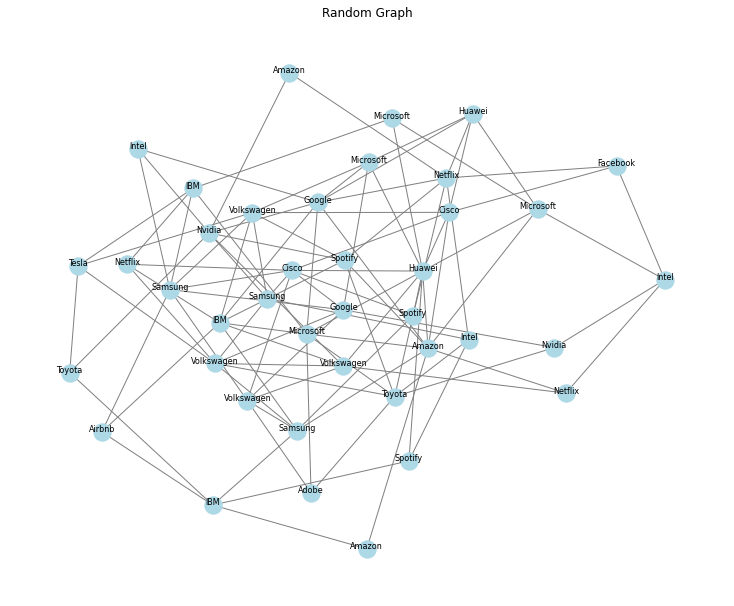

In [71]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
import numpy as np
import random

company_names = [
    "Amazon", "Google", "Apple", "Microsoft",
    "Toyota", "Volkswagen", "Tesla", "BMW",
    "Samsung", "Intel", "IBM", "Facebook",
    "Huawei", "Cisco", "Nvidia", "Adobe",
    "Netflix", "PayPal", "Spotify", "Airbnb"
]

random_graph = nx.gnm_random_graph(n=40, m=105)  # 30개의 노드와 45개의 엣지를 가진 그래프
random_company_names = {node: random.choice(company_names) for node in random_graph.nodes}

# 그래프 시각화
plt.figure(figsize=(10, 8))
pos_random = nx.spring_layout(random_graph)
nx.draw(random_graph, pos_random, with_labels=False, node_color='lightblue', edge_color='gray')
# 노드 라벨 추가 (회사 이름)
for node, position in pos_random.items():
    plt.text(position[0], position[1], s=random_company_names[node], horizontalalignment='center', fontsize=8)
    
plt.title("Random Graph")
plt.savefig("ori_KG.png")
plt.show()

In [2]:
X = nx.to_numpy_array(random_graph)

c:\Users\chanyoung\anaconda3\envs\cooling\lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
c:\Users\chanyoung\anaconda3\envs\cooling\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\chanyoung\anaconda3\envs\cooling\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


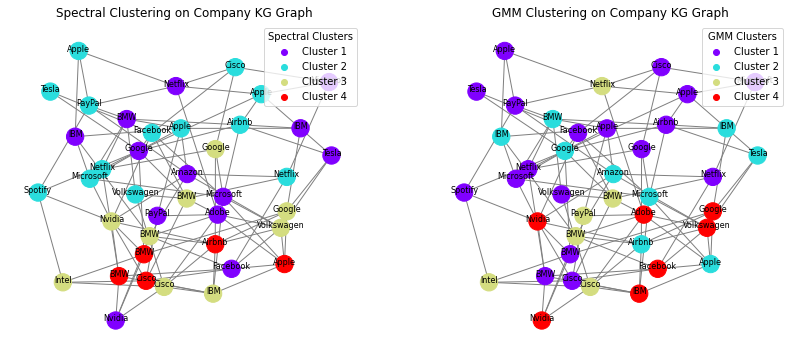

In [36]:
# 스펙트럴 클러스터링 및 GMM 클러스터링 준비
sc_random = SpectralClustering(4, affinity='nearest_neighbors', random_state=42)
gmm_random = GaussianMixture(n_components=4, random_state=42)

# 클러스터링 적용
sc_random_labels = sc_random.fit_predict(nx.to_numpy_array(random_graph))
gmm_random_labels = gmm_random.fit_predict(nx.to_numpy_array(random_graph))

colors_sc = plt.cm.rainbow(np.linspace(0, 1, len(set(sc_random_labels))))
colors_gmm = plt.cm.rainbow(np.linspace(0, 1, len(set(gmm_random_labels))))

# Clustering results visualization and saving
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Spectral Clustering result
nx.draw(random_graph, pos_random, ax=ax[0], node_color=sc_random_labels, cmap=plt.cm.rainbow, with_labels=False, edge_color='gray')
for node, position in pos_random.items():
    ax[0].text(position[0], position[1], s=random_company_names[node], horizontalalignment='center', fontsize=8)
ax[0].set_title('Spectral Clustering on Company KG Graph')

# GMM Clustering result
nx.draw(random_graph, pos_random, ax=ax[1], node_color=gmm_random_labels, cmap=plt.cm.rainbow, with_labels=False, edge_color='gray')
for node, position in pos_random.items():
    ax[1].text(position[0], position[1], s=random_company_names[node], horizontalalignment='center', fontsize=8)
ax[1].set_title('GMM Clustering on Company KG Graph')

# Adding legends
for i, color in enumerate(colors_sc):
    ax[0].scatter([], [], color=color, label=f'Cluster {i+1}')
ax[0].legend(title="Spectral Clusters", loc="upper right")

for i, color in enumerate(colors_gmm):
    ax[1].scatter([], [], color=color, label=f'Cluster {i+1}')
ax[1].legend(title="GMM Clusters", loc="upper right")

# File saving
#output_file = '/mnt/data/clustering_results.png'
#plt.savefig(output_file)
plt.savefig('clustering_KG.png')
plt.show()

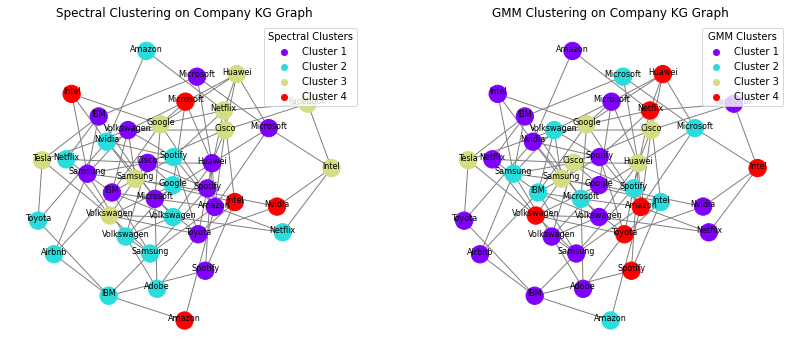

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# Spectral Clustering result
nx.draw(random_graph, pos_random, ax=ax[0], node_color=sc_random_labels, cmap=plt.cm.rainbow, with_labels=False, edge_color='gray')
for node, position in pos_random.items():
    ax[0].text(position[0], position[1], s=random_company_names[node], horizontalalignment='center', fontsize=8)
ax[0].set_title('Spectral Clustering on Company KG Graph')

# GMM Clustering result
nx.draw(random_graph, pos_random, ax=ax[1], node_color=gmm_random_labels, cmap=plt.cm.rainbow, with_labels=False, edge_color='gray')
for node, position in pos_random.items():
    ax[1].text(position[0], position[1], s=random_company_names[node], horizontalalignment='center', fontsize=8)
ax[1].set_title('GMM Clustering on Company KG Graph')

# Adding legends
for i, color in enumerate(colors_sc):
    ax[0].scatter([], [], color=color, label=f'Cluster {i+1}')
ax[0].legend(title="Spectral Clusters", loc="upper right")

for i, color in enumerate(colors_gmm):
    ax[1].scatter([], [], color=color, label=f'Cluster {i+1}')
ax[1].legend(title="GMM Clusters", loc="upper right")

# File saving
#output_file = '/mnt/data/clustering_results.png'
#plt.savefig(output_file)
plt.savefig('clustering_KG2.png')
plt.show()

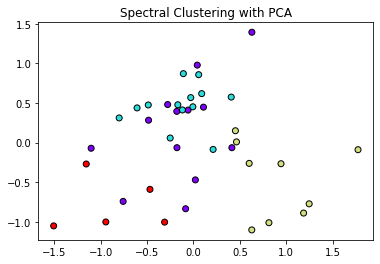

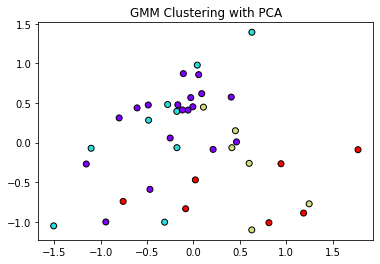

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(nx.to_numpy_array(random_graph))

# 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=colors_sc[sc_random_labels], edgecolor='k')
plt.title('Spectral Clustering with PCA')
plt.savefig('spectral_pca_company.png')
plt.show()

# 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=colors_sc[gmm_random_labels], edgecolor='k')
plt.title('GMM Clustering with PCA')
plt.savefig('GMM_pca_company.png')
plt.show()

c:\Users\chanyoung\anaconda3\envs\cooling\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


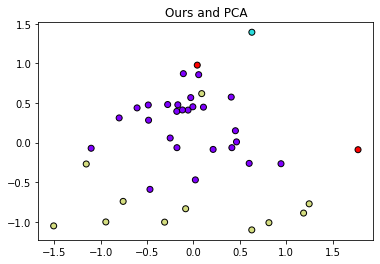

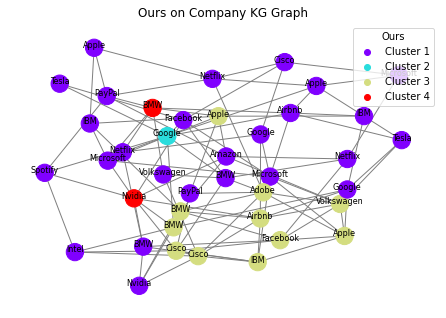

In [34]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import euclidean
from scipy.sparse.linalg import eigsh


def create_similarity_matrix(data, sigma):
    n = len(data)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1, n):
            similarity_matrix[i, j] = np.exp(-euclidean(data[i], data[j])**2 / (2 * sigma**2)) 
            similarity_matrix[j, i] = similarity_matrix[i, j]

    return similarity_matrix

def spectral_clustering(data, n_clusters):
    sigma = estimate_sigma(data)
    similarity_matrix = create_similarity_matrix(data, sigma)
    laplacian_matrix = np.diag(np.sum(similarity_matrix, axis=1)) - similarity_matrix
    _, eigenvectors = eigsh(laplacian_matrix, k=n_clusters, which='SM')
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(eigenvectors)
    
    return labels

def kmeans(data, k, max_iters=100):
    n, m = data.shape
    centroids = data[np.random.choice(n, k, replace=False)]
    labels = np.zeros(n)
    
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        for i in range(k):
            centroids[i] = np.mean(data[labels == i], axis=0)
    
    return centroids, labels

def estimate_sigma(data):
    pairwise_distances = euclidean_distances(data, data)
    sigma = np.mean(pairwise_distances)
    return sigma

def calculate_silhouette_score(data, n_clusters, kernel_matrix=None):
    if kernel_matrix is None:
        sigma = estimate_sigma(data)
        kernel_matrix = np.exp(-euclidean_distances(data, data)**2 / (2 * sigma**2))

    laplacian_matrix = np.diag(np.sum(kernel_matrix, axis=1)) - kernel_matrix
    _, eigenvectors = eigsh(laplacian_matrix, k=n_clusters, which='SM')
    centroids, labels = kmeans(eigenvectors, n_clusters)

    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

def find_optimal_clusters(data, max_clusters, kernel_matrix=None):
    silhouette_scores = []

    for n_clusters in range(2, max_clusters + 1):
        silhouette_avg = calculate_silhouette_score(data, n_clusters, kernel_matrix)
        silhouette_scores.append(silhouette_avg)

    optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2
    return optimal_clusters

def spectral_clustering_rbf_auto(data, max_clusters, kernel_matrix=None):
    optimal_clusters = find_optimal_clusters(data, max_clusters, kernel_matrix)
    return spectral_clustering(data, optimal_clusters)


max_clusters = 3  # 최대 클러스터 개수 설정
labels_rbf_auto = spectral_clustering_rbf_auto(nx.to_numpy_array(random_graph), max_clusters)

# PCA를 사용하여 주성분 2개로 차원 축소
pca = PCA(n_components=4)
X_pca = pca.fit_transform(nx.to_numpy_array(random_graph))

# 색상 설정
colors_rbf_auto = plt.cm.rainbow(np.linspace(0, 1, len(set(labels_rbf_auto))))

# 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=colors_rbf_auto[labels_rbf_auto], edgecolor='k')
plt.title('Ours and PCA')
plt.savefig('ours_pca_company.png')
plt.show()

nx.draw(random_graph, pos_random, node_color=labels_rbf_auto, cmap=plt.cm.rainbow, with_labels=False, edge_color='gray')
for node, position in pos_random.items():
    plt.text(position[0], position[1], s=random_company_names[node], horizontalalignment='center', fontsize=8)
#plt.set_title('Spectral Clustering on Company KG Graph')

for i, color in enumerate(colors_rbf_auto):
    plt.scatter([], [], color=color, label=f'Cluster {i+1}')
plt.legend(title="Ours", loc="upper right")
plt.title('Ours on Company KG Graph')
plt.savefig('ours_KG_company.png')
plt.show()


c:\Users\chanyoung\anaconda3\envs\cooling\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


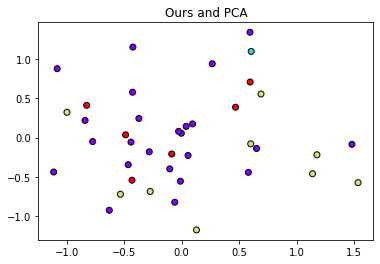

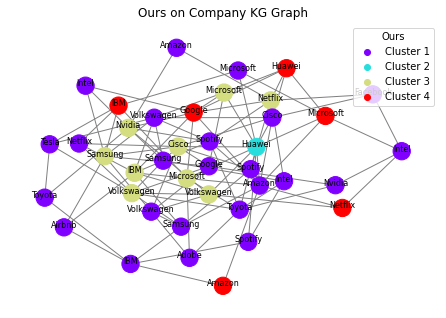

In [74]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import euclidean
from scipy.sparse.linalg import eigsh

def create_similarity_matrix(data, sigma):
    n = len(data)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1, n):
            similarity_matrix[i, j] = np.exp(-euclidean(data[i], data[j])**2 / (2 * sigma**2)) 
            similarity_matrix[j, i] = similarity_matrix[i, j]

    return similarity_matrix

def kmeans(data, k, max_iters=100):
    n, m = data.shape
    centroids = data[np.random.choice(n, k, replace=False)]
    labels = np.zeros(n)
    
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        for i in range(k):
            centroids[i] = np.mean(data[labels == i], axis=0)
    
    return centroids, labels

def estimate_sigma(data):
    pairwise_distances = euclidean_distances(data, data)
    sigma = np.mean(pairwise_distances)
    return sigma

def calculate_silhouette_score(data, n_clusters, kernel_matrix=None):
    if kernel_matrix is None:
        sigma = estimate_sigma(data)
        kernel_matrix = np.exp(-euclidean_distances(data, data)**2 / (2 * sigma**2))

    laplacian_matrix = np.diag(np.sum(kernel_matrix, axis=1)) - kernel_matrix
    _, eigenvectors = eigsh(laplacian_matrix, k=n_clusters, which='SM')
    centroids, labels = kmeans(eigenvectors, n_clusters)

    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

def find_optimal_clusters(data, max_clusters, kernel_matrix=None):
    silhouette_scores = []

    for n_clusters in range(2, max_clusters + 1):
        silhouette_avg = calculate_silhouette_score(data, n_clusters, kernel_matrix)
        silhouette_scores.append(silhouette_avg)

    optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2
    return optimal_clusters

def spectral_clustering(data, n_clusters):
    sigma = estimate_sigma(data)
    similarity_matrix = create_similarity_matrix(data, sigma)
    laplacian_matrix = np.diag(np.sum(similarity_matrix, axis=1)) - similarity_matrix
    _, eigenvectors = eigsh(laplacian_matrix, k=n_clusters, which='SM')
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(eigenvectors)
    
    return labels

def spectral_clustering_rbf_auto(data, max_clusters, kernel_matrix=None):
    optimal_clusters = find_optimal_clusters(data, max_clusters, kernel_matrix)
    return spectral_clustering(data, optimal_clusters)


max_clusters = 3  # 최대 클러스터 개수 설정
labels_rbf_auto = spectral_clustering_rbf_auto(nx.to_numpy_array(random_graph), max_clusters)

# PCA를 사용하여 주성분 2개로 차원 축소
pca = PCA(n_components=4)
X_pca = pca.fit_transform(nx.to_numpy_array(random_graph))

# 색상 설정
colors_rbf_auto = plt.cm.rainbow(np.linspace(0, 1, len(set(labels_rbf_auto))))

# 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 2], c=colors_rbf_auto[labels_rbf_auto], edgecolor='k')
plt.title('Ours and PCA')
plt.savefig('ours_pca_company2.png')
plt.show()

nx.draw(random_graph, pos_random, node_color=labels_rbf_auto, cmap=plt.cm.rainbow, with_labels=False, edge_color='gray')
for node, position in pos_random.items():
    plt.text(position[0], position[1], s=random_company_names[node], horizontalalignment='center', fontsize=8)
#plt.set_title('Spectral Clustering on Company KG Graph')

for i, color in enumerate(colors_rbf_auto):
    plt.scatter([], [], color=color, label=f'Cluster {i+1}')
plt.legend(title="Ours", loc="upper right")
plt.title('Ours on Company KG Graph')
plt.savefig('ours_KG_company2.png')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import euclidean
from scipy.sparse.linalg import eigsh
from sklearn.mixture import GaussianMixture

def create_similarity_matrix(data, sigma):
    n = len(data)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1, n):
            similarity_matrix[i, j] = np.exp(-euclidean(data[i], data[j])**2 / (2 * sigma**2)) 
            similarity_matrix[j, i] = similarity_matrix[i, j]

    return similarity_matrix

def kmeans(data, k, max_iters=100):
    n, m = data.shape
    centroids = data[np.random.choice(n, k, replace=False)]
    labels = np.zeros(n)
    
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        for i in range(k):
            centroids[i] = np.mean(data[labels == i], axis=0)
    
    return centroids, labels

def estimate_sigma(data):
    pairwise_distances = euclidean_distances(data, data)
    sigma = np.mean(pairwise_distances)
    return sigma

def calculate_silhouette_score(data, n_clusters, kernel_matrix=None):
    if kernel_matrix is None:
        sigma = estimate_sigma(data)
        kernel_matrix = np.exp(-euclidean_distances(data, data)**2 / (2 * sigma**2))

    laplacian_matrix = np.diag(np.sum(kernel_matrix, axis=1)) - kernel_matrix
    _, eigenvectors = eigsh(laplacian_matrix, k=n_clusters, which='SM')
    centroids, labels = kmeans(eigenvectors, n_clusters)

    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

def find_optimal_clusters(data, max_clusters, kernel_matrix=None):
    silhouette_scores = []

    for n_clusters in range(2, max_clusters + 1):
        silhouette_avg = calculate_silhouette_score(data, n_clusters, kernel_matrix)
        silhouette_scores.append(silhouette_avg)

    optimal_clusters = np.argmax(silhouette_scores) + 2  
    return optimal_clusters

def spectral_clustering(data, n_clusters):
    sigma = estimate_sigma(data)
    similarity_matrix = create_similarity_matrix(data, sigma)
    laplacian_matrix = np.diag(np.sum(similarity_matrix, axis=1)) - similarity_matrix
    _, eigenvectors = eigsh(laplacian_matrix, k=n_clusters, which='SM')
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm.fit_predict(eigenvectors)
    
    return labels

def spectral_clustering_rbf_auto(data, max_clusters, kernel_matrix=None):
    optimal_clusters = find_optimal_clusters(data, max_clusters, kernel_matrix)
    return spectral_clustering(data, optimal_clusters)